In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
df=pd.read_csv("train.csv")
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
ds=df.values
print(ds.shape)
X=ds[:,1:]
Y=ds[:,0]
print(X.shape,Y.shape)

(42000, 785)
((42000, 784), (42000,))


In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


# knn

In [12]:
def dist(x1,x2):
    return np.sqrt(((x2-x1)**2).sum())

In [13]:
def knn(x_train,y_train,query_x,k=5):
    #First Step
    d_vals = []
    
    m = x_train.shape[0]
    for i in range(m):
        d = dist(query_x,x_train[i])
        d_vals.append((d,y_train[i]))    #list of value of distance with the label
        
    d_vals = sorted(d_vals)
    d_vals = d_vals[:k]       #as we want to pick first k points(knn)
    
    y = np.array(d_vals)
    t = np.unique(y[:,1],return_counts=True)
    index = t[1].argmax()
    prediction  = t[0][index]
    return prediction

In [14]:
# to visualise sample
def visu(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

4


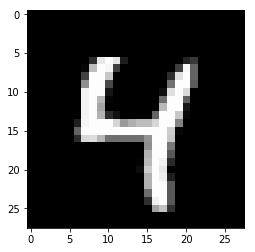

4


In [15]:
# to make predictions
pred=knn(x_train,y_train,x_test[6])
print(int(pred))
visu(x_test[6])
print(y_test[6])